In [1]:
import os
import sys
import requests
client_id = "cbxhzui4en"
client_secret = "m7YcN6l15L4l4hSgVRTfAiArIHbEK8S384Q55fIX"
url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect"
files = {'image': open('22.jpg', 'rb')}
headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"predictions": [{"num_detections": 6, "detection_classes": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "detection_names": ["person", "person", "person", "person", "person", "person"], "detection_scores": [0.999255, 0.999164, 0.99915, 0.998819, 0.998767, 0.997874], "detection_boxes": [[0.0920163, 0.338913, 0.97379, 0.529078], [0.0182424, 0.180083, 0.968082, 0.346171], [0.0944913, 0.0383242, 0.967666, 0.189926], [0.13278, 0.509849, 0.964331, 0.66173], [0.0383719, 0.808489, 0.971553, 0.963727], [0.111125, 0.664126, 0.976132, 0.815657]]}]}


In [2]:
axes = response.json()['predictions'][0]['detection_boxes']

<IPython.core.display.Javascript object>


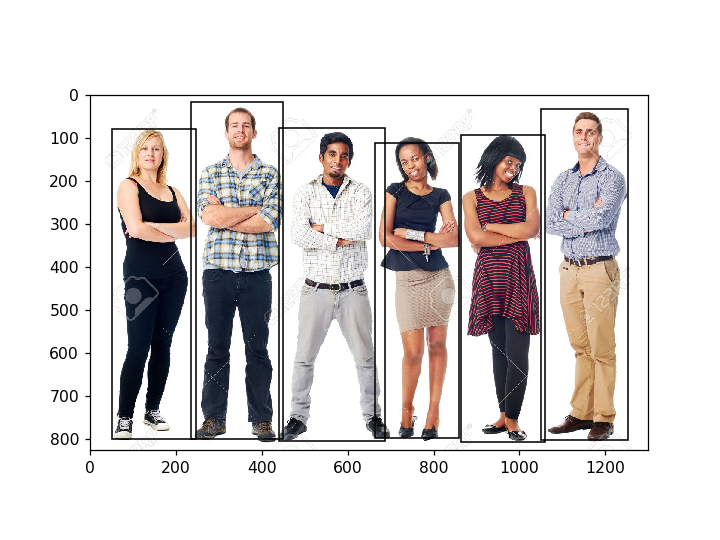

1300


In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib notebook
    
img = imread('22.jpg') # 이미지 읽어오기
fig,ax = plt.subplots(1)
ax.imshow(img)
size_y = len(img)
size_x = len(img[0])
print(size_x)
import matplotlib.patches as patches
for i in range(len(axes)):
    rect = patches.Rectangle((axes[i][1] * size_x, (axes[i][0]) *size_y),size_x  * (axes[i][3]-axes[i][1]), size_y * (axes[i][2]-axes[i][0]),fill=False)
    ax.add_patch(rect)
plt.show()

In [7]:
import cv2

 

# color 설정

blue_color = (255, 0, 0)

green_color = (0, 255, 0)

red_color = (0, 0, 255)

white_color = (255, 255, 255)

 

# 모두 0으로 되어 있는 빈 Canvas(검정색)
img = cv2.imread("22.jpg", cv2.IMREAD_UNCHANGED)
for i in range(len(axes)):
    img = cv2.rectangle(img, (int(axes[i][0]*size_x), int(axes[i][1]*size_y)), (int(axes[i][2]*size_x), int(axes[i][3]*size_y)), (0,255,0), 5)
cv2.imshow('rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()